In [7]:
### import libraries
import os
import cv2 as cv2
import numpy as np
import json  as json
import imutils
import math
from matplotlib import pyplot as plt

path_dataset = './dataset/bilboards/'

def iread(img_path, resize_width=None):
    img = cv2.imread(path_dataset + img_path)
    if resize_width is not None:
        img = imutils.resize(img, width=resize_width)
    return img

def iinfo(img):
    print("[IMAGE] height: {} x width: {} x channels: {} - data type: {}".format(
        img.shape[0], 
        img.shape[1], 
        (img.shape[2] if img.ndim > 2 else 0),
        img.dtype))

## Preface - Hough Extended Transform 

We start performing Hough Extended Transform in a bilboard frame.
This frame is quite interesting because it shows the electrical wires deformed by the radial distortions.

The **electrical wires** may be assumed as **lines** representation on the radial distorted space. 

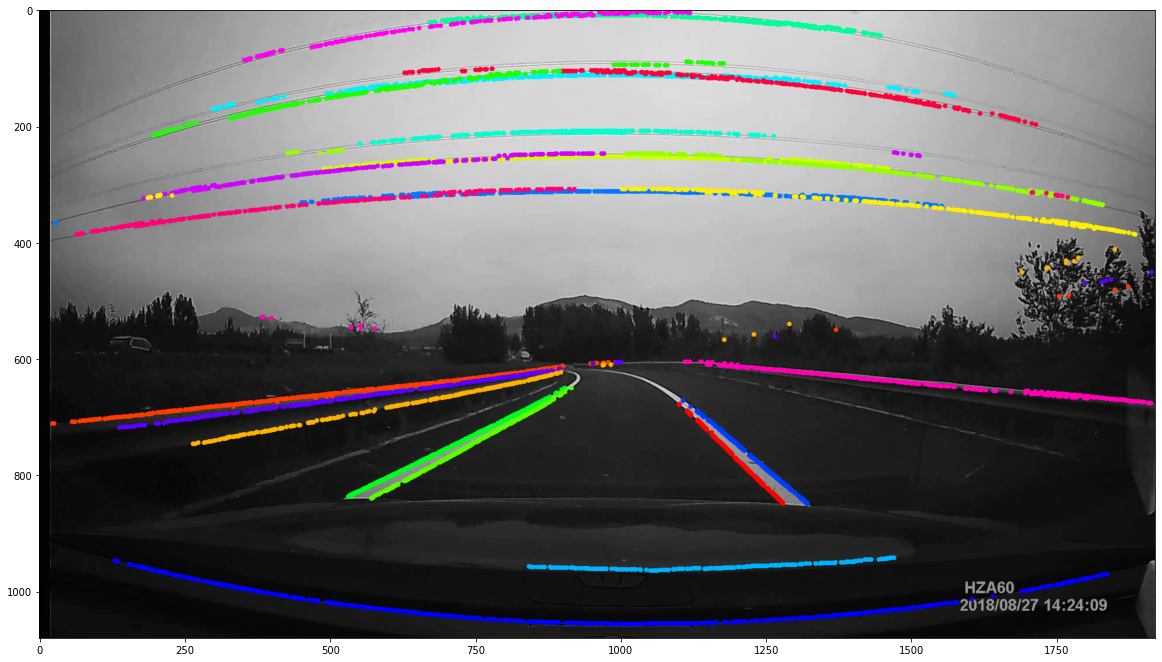

In [11]:
nemesis = iread('dataset_IMG_0249_18.png')
plt.figure(figsize = (20,20))
plt.imshow(nemesis)

### Starting Point - Edges 

We start from the edges points extracted by the Hough Extended transform, just to be sure that both we are working in the same points

[IMAGE] height: 1080 x width: 1920 x channels: 0 - data type: uint8


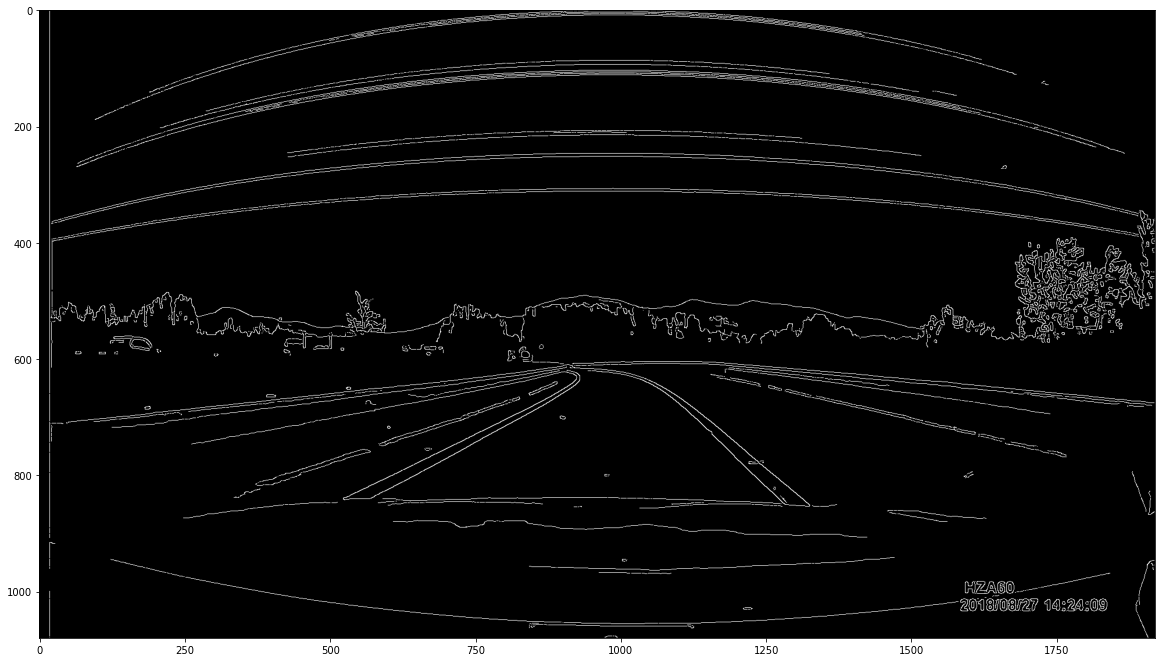

In [17]:
edges_rgb   = iread('dataset_IMG_0249_18_canny.png')
edges_white = cv2.cvtColor(edges_rgb, cv2.COLOR_BGR2GRAY)
edges = cv2.bitwise_not(edges_white)

plt.figure(figsize=(20,20))
plt.imshow(edges, cmap='gray')
iinfo(edges)

### Extract The Roi

From the eges we extract the roi usefull for the preference trick

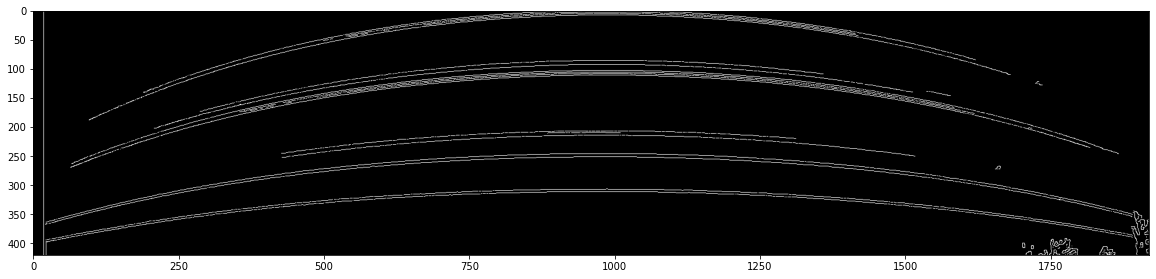

In [32]:
roi=edges[0:420, 0:]
plt.figure(figsize=(20, 20))
plt.imshow(roi, cmap='gray')

### Clustering comparing KMeans vs DBScan

From the roi extracted now we perform two different clustering algorithm, KMeans and Dbscan.
We perform this task because we want dimonstrate that with data effected by radial distortion a Soft Clustering is prefered.

In [25]:
from sklearn.cluster import DBSCAN, KMeans

In [54]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py
X = roi
db = DBSCAN(eps=1.0, min_samples=5)

In [57]:
X.shape

(420, 1920)

In [62]:
 X = np.array([[1, 2], [2, 2], [2, 3],
...               [8, 7], [8, 8], [25, 80]])

db = DBSCAN(eps=3, min_samples=2).fit(X)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=db.fit_predict(X), s=50, edgecolor='k')

In [105]:
row, col = roi.nonzero()
print(row.shape)
print(col.shape)
print ("MUST BE 255: {}".format(roi[row[0], col[0]]))

pts = np.column_stack((col, row))
print(pts.shape)
print ("MUST BE 255: {}".format(roi[pts[0, 0], pts[0, 1]]))



(23003,)
(23003,)
MUST BE 255: 255
(23003, 2)
MUST BE 255: 0


In [107]:
db = DBSCAN(eps=1, min_samples=100).fit(pts)
plt.gca().invert_yaxis()
plt.scatter(pts[:, 0], pts[:, 1], marker='o', c=db.fit_predict(pts), s=1, edgecolor='m')

In [86]:
pts[:, 0]

TypeError: list indices must be integers or slices, not tuple